In [1]:
import sys
sys.path.insert(0, '../src')
sys.path.insert(0, '../')

In [2]:
import torch
from models.re_resnet import ReResNet

def load_state_dict(module, state_dict, strict=False, logger=None):
    """Load state_dict to a module.

    This method is modified from :meth:`torch.nn.Module.load_state_dict`.
    Default value for ``strict`` is set to ``False`` and the message for
    param mismatch will be shown even if strict is False.

    Args:
        module (Module): Module that receives the state_dict.
        state_dict (OrderedDict): Weights.
        strict (bool): whether to strictly enforce that the keys
            in :attr:`state_dict` match the keys returned by this module's
            :meth:`~torch.nn.Module.state_dict` function. Default: ``False``.
        logger (:obj:`logging.Logger`, optional): Logger to log the error
            message. If not specified, print function will be used.
    """
    unexpected_keys = []
    shape_mismatch_pairs = []

    own_state = module.state_dict()
    for name, param in state_dict.items():
        if name not in own_state:
            unexpected_keys.append(name)
            continue
        if isinstance(param, torch.nn.Parameter):
            # backwards compatibility for serialized parameters
            param = param.data
        if param.size() != own_state[name].size():
            shape_mismatch_pairs.append(
                [name, own_state[name].size(),
                 param.size()])
            continue
        own_state[name].copy_(param)


in_weight = '../models/original_re_resnet50_epoch_100.pth'
ckpt = torch.load(in_weight)
old_state_dict = ckpt["state_dict"]

new_state_dict = {}
for k, v in old_state_dict.items():
    new_k = k.replace("backbone.", "")
    new_state_dict[new_k] = v
    
model = ReResNet(
    depth=50,
    num_stages=4,
    out_indices=(0, 1, 2, 3),
    style='pytorch',
    orientation=8,
    fixparams=False,
    )


/opt/conda/lib/python3.7/site-packages/e2cnn/nn/modules/r2_conv/basisexpansion_singleblock.py:80: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at /usr/local/src/pytorch/aten/src/ATen/native/IndexingUtils.h:27.)
  full_mask[mask] = norms.to(torch.uint8)


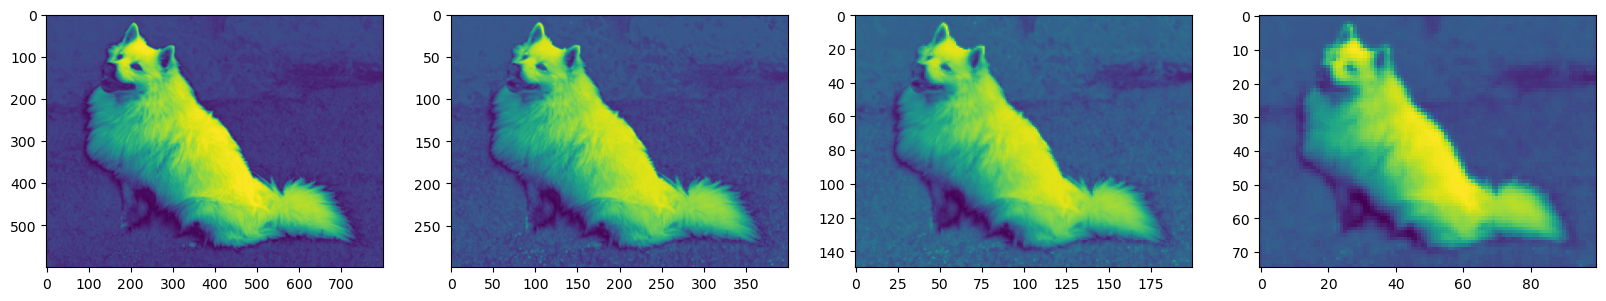

In [10]:
from feature_extractor import ReCNN
from image import load_image
import matplotlib.pyplot as plt
import cv2

img = load_image('dog.jpg')
img = cv2.resize(img, (1600, 1200))

cnn = ReCNN(model_path=None)
output = cnn(img)
output.visualize()

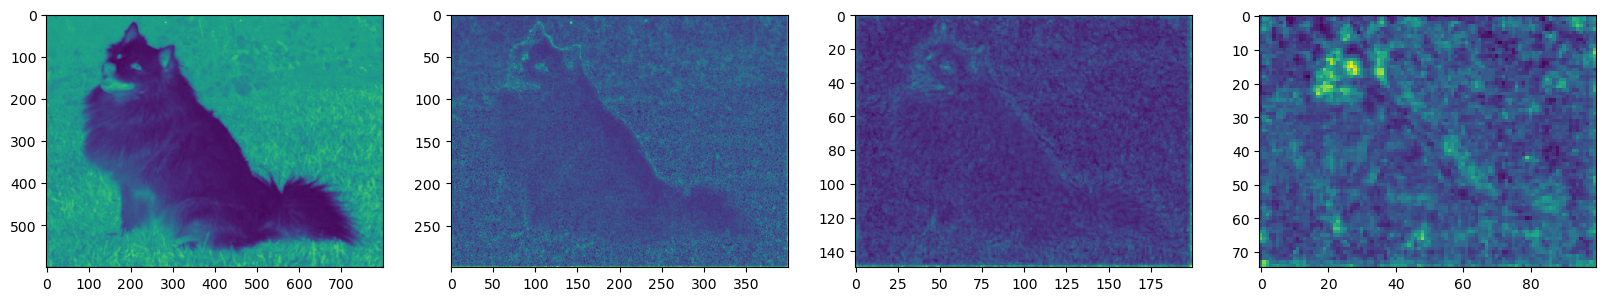

In [11]:
cnn = ReCNN()
output = cnn(img)
output.visualize()

In [ ]:

# load_state_dict(model, new_state_dict)
# torch.save(model.state_dict(), '../models/re_resnet50.pth')